<a href="https://colab.research.google.com/github/nagarad/OCR/blob/main/OCR_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib import image as mpimg
import glob
import cv2
import matplotlib.image as mpimg
from PIL import Image, ImageFile
import sys
import PIL
import easyocr
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
path = '/content/sample_data/OCR_Images'

In [5]:
print(os.listdir(path))


['00920576.tif', '0001431487.tif', '0001144288.tif', '00922240.tif', '0001139626.tif', '0001136521.tif', '0001139716.tif', '00921466.tif']


In [6]:
df=[]

for image in os.listdir(path):
    print(image)
    

00920576.tif
0001431487.tif
0001144288.tif
00922240.tif
0001139626.tif
0001136521.tif
0001139716.tif
00921466.tif


In [7]:
Doc = []



for i in os.listdir(path):
  Doc.append(i)

In [8]:
all_files = Doc 
Doc_id = [i.replace('.tif', '') for i in all_files]


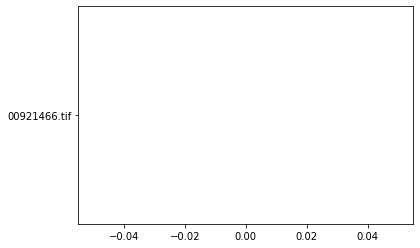

In [9]:
plt.figure()
plt.plot(i)
plt.show()

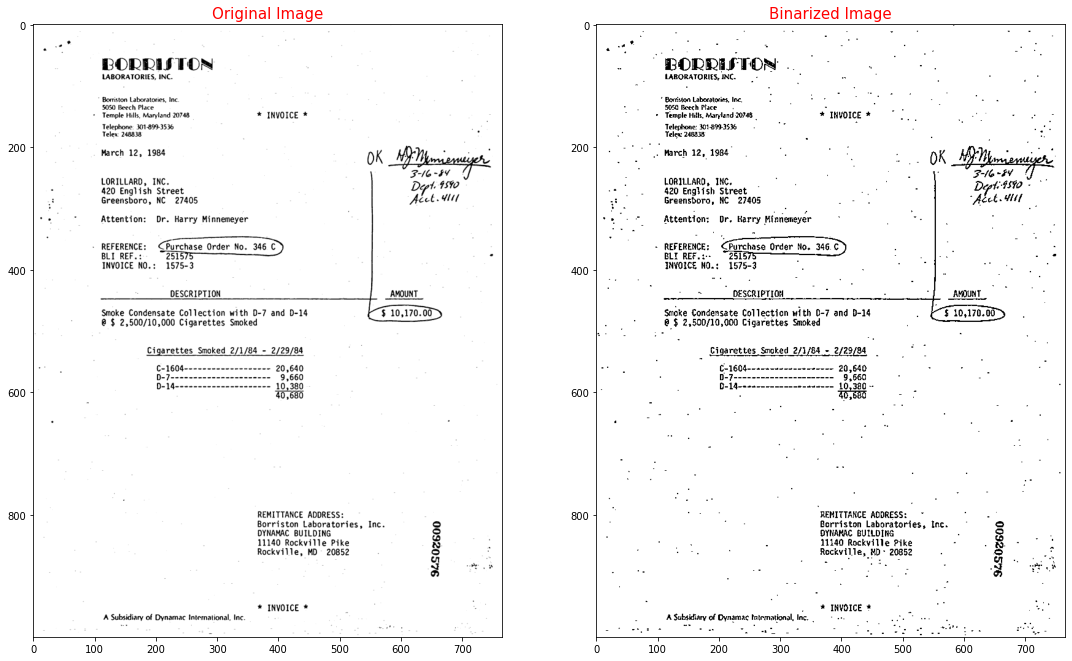

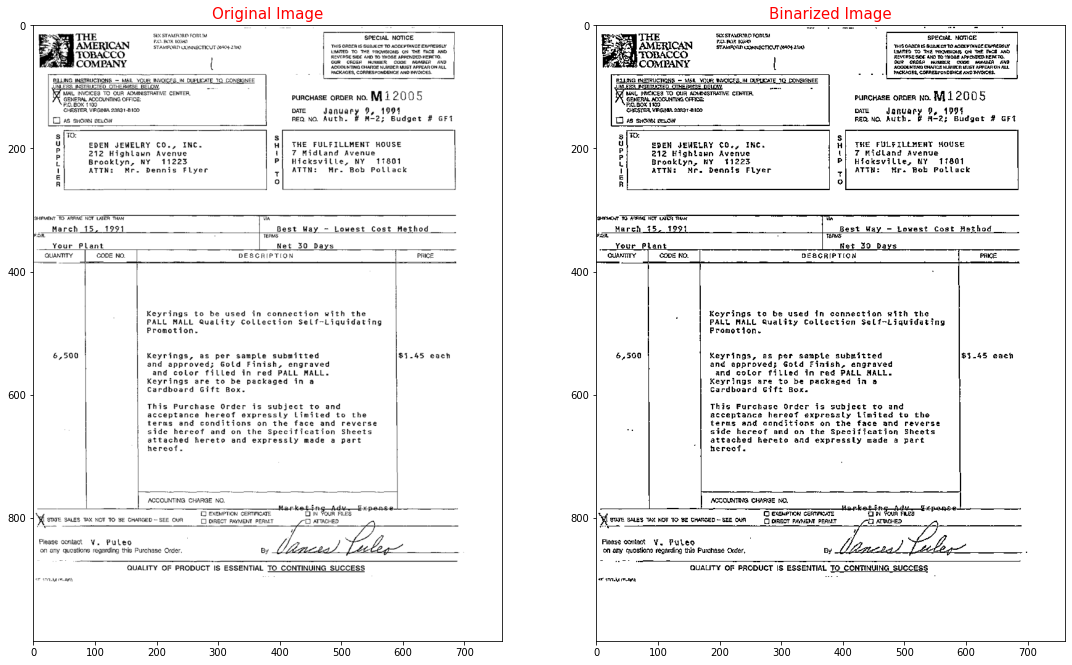

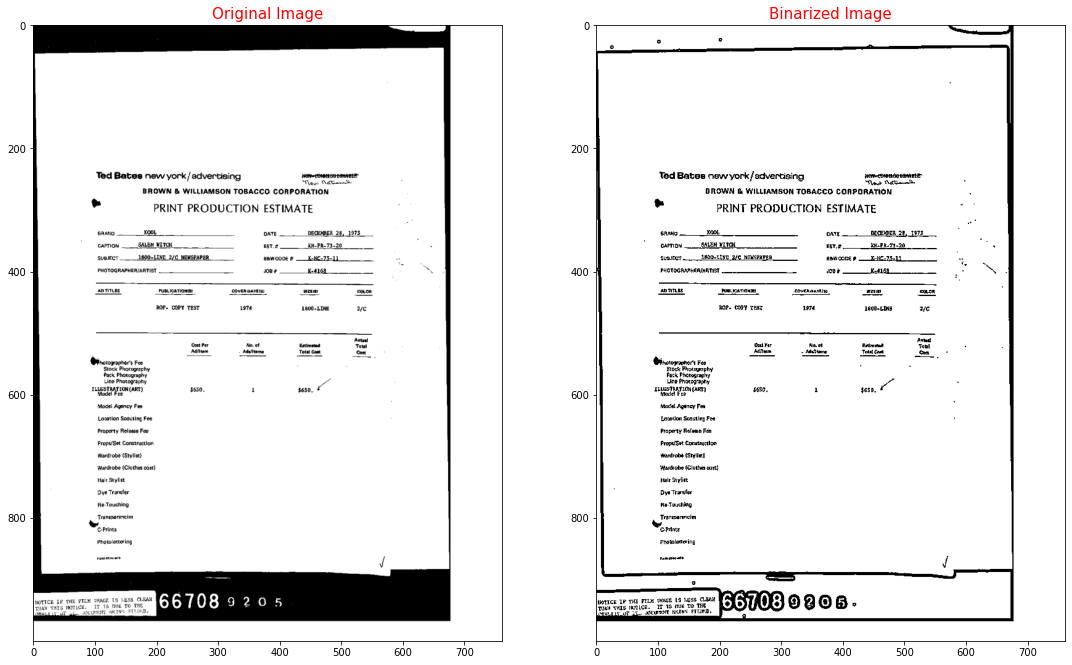

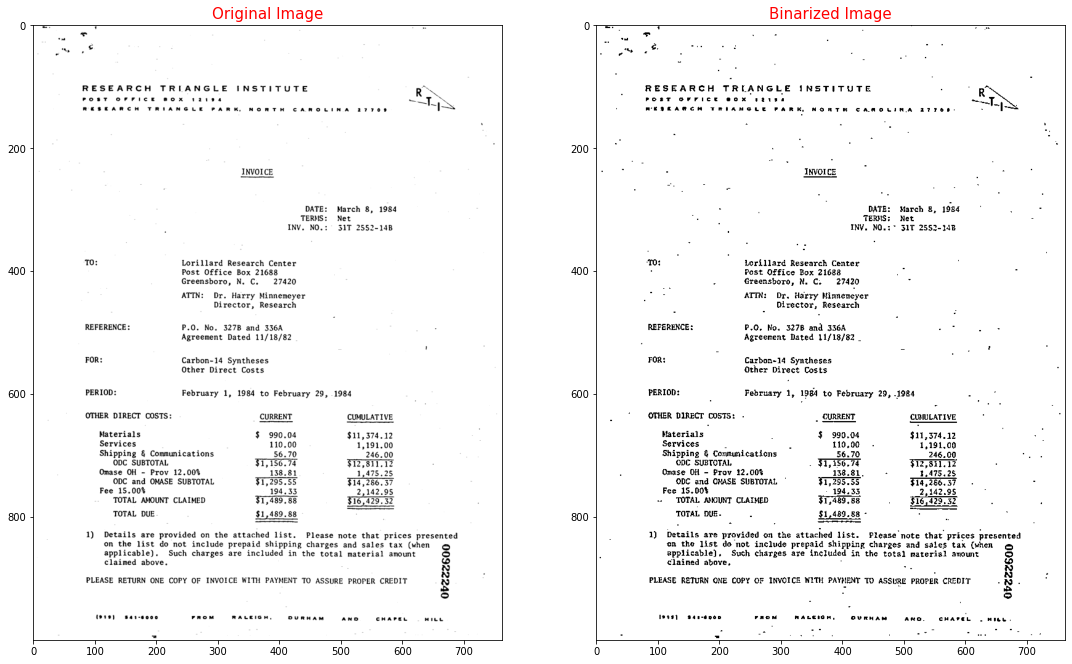

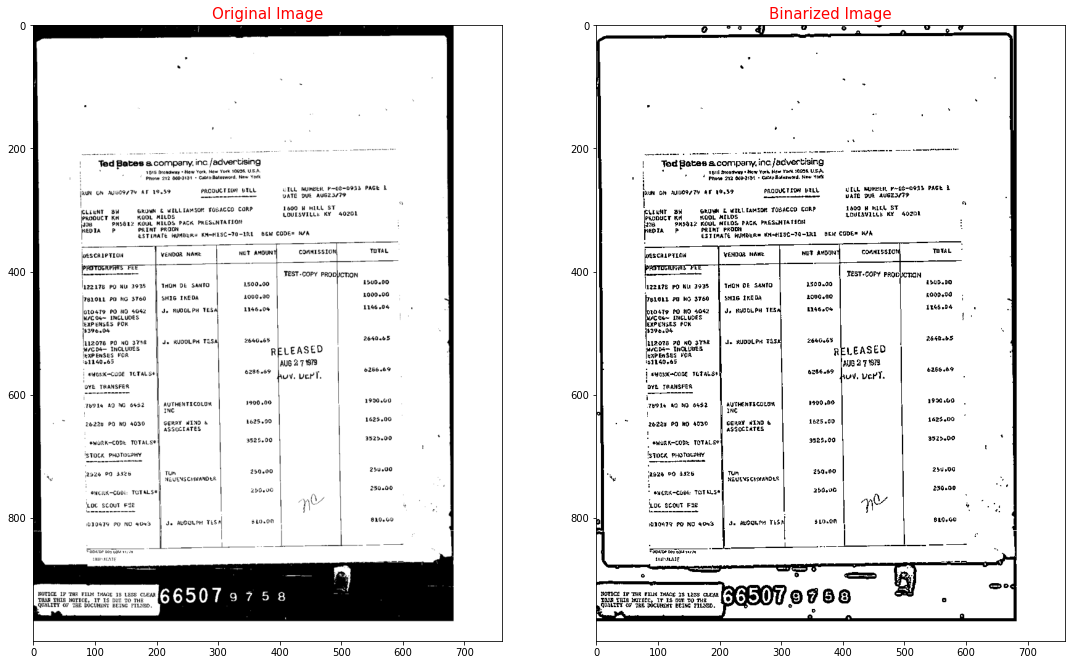

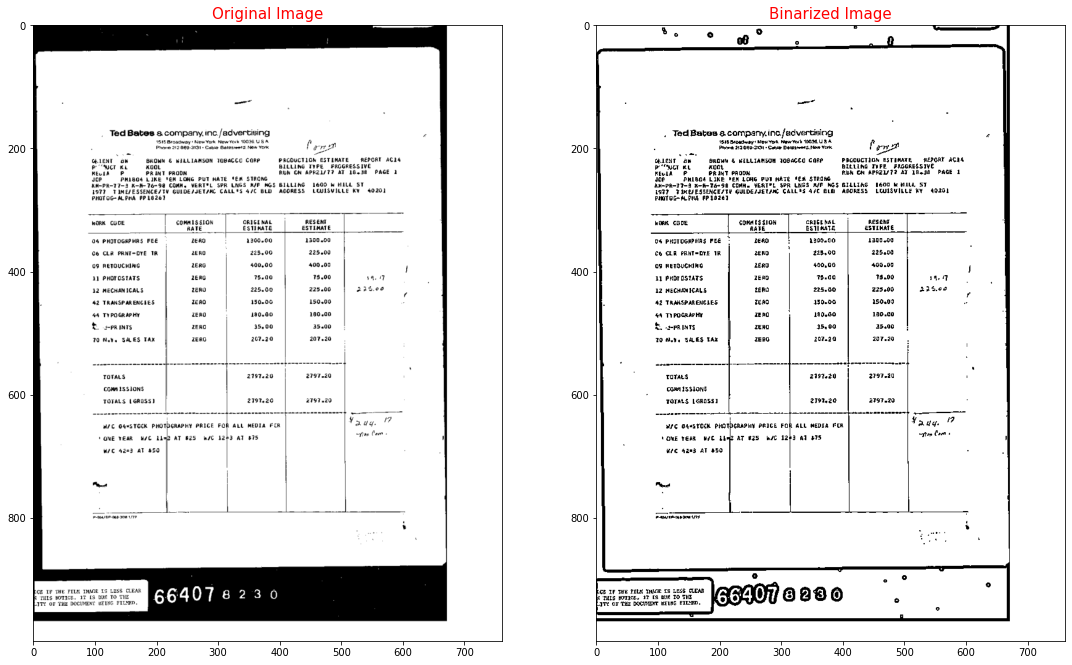

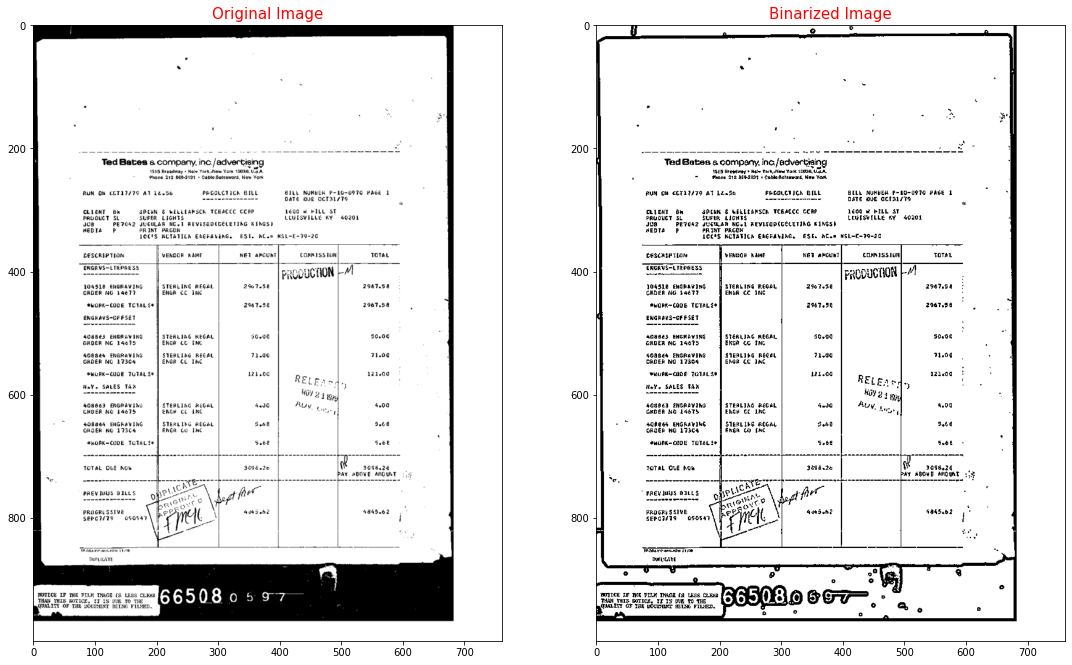

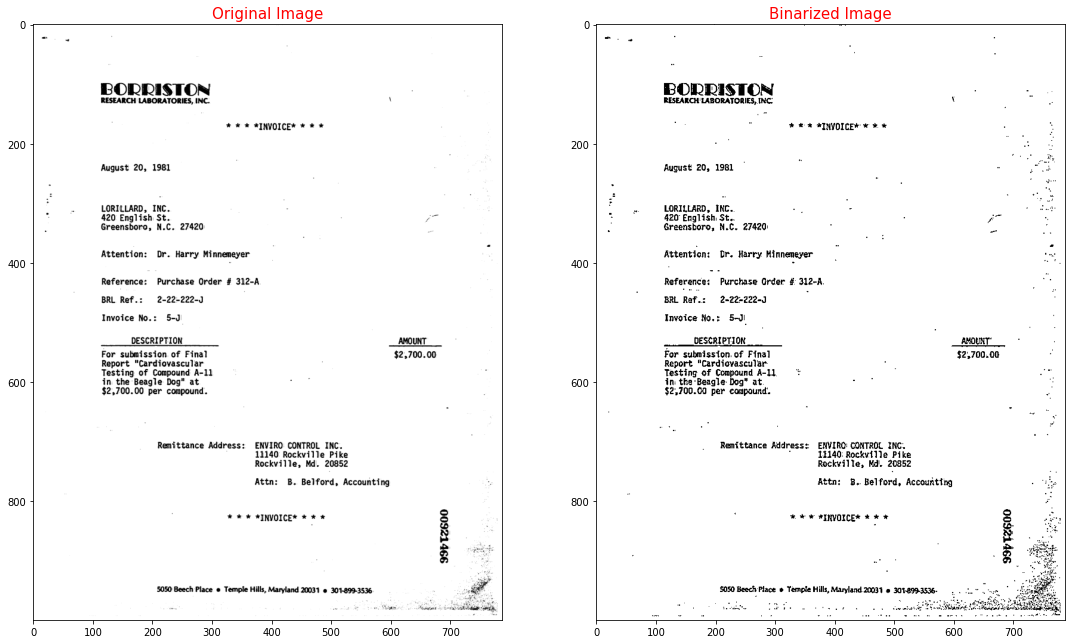

In [9]:
for i in Doc:
    image = mpimg.imread(path + '/' + i)
    f,ax = plt.subplots(1, 2, figsize=(18.5, 24))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image', fontsize=15, color='red')

    image_binarize = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    ax[1].imshow(image_binarize, cmap='gray')
    ax[1].set_title('Binarized Image', fontsize=15, color='red')
    cv2.imwrite('Resized_folder.jpg*',image_binarize )


In [29]:
X = []
Y = []
Shape = []


dsize = (500,500)
for i in Doc:
    img_array = mpimg.imread(path + '/' + i)
    new_array = cv2.resize(img_array, dsize)
    new_array = new_array.reshape(-1)
    X.append(np.array(new_array))
    Y.append(np.array(i))
    Shape.append(new_array.shape)


In [36]:
Y = np.array(Y)

In [42]:
X = np.array(X).reshape(-1,500,500,1)


In [43]:
X = np.array(X)
X = X.astype('float32')
X /= 255.0

In [45]:
del list

In [46]:
list = list(zip(Doc_id,X,Shape))

In [47]:
df = pd.DataFrame(list, columns=['Label','Dimensions','Shape'])
df.head

<bound method NDFrame.head of         Label                                         Dimensions      Shape
0    00920576  [[[1.5378702e-05], [1.5378702e-05], [1.5378702...  (250000,)
1  0001431487  [[[1.5378702e-05], [1.5378702e-05], [1.5378702...  (250000,)
2  0001144288  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  (250000,)
3    00922240  [[[1.5378702e-05], [1.5378702e-05], [1.5378702...  (250000,)
4  0001139626  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  (250000,)
5  0001136521  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  (250000,)
6  0001139716  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  (250000,)
7    00921466  [[[1.5378702e-05], [1.5378702e-05], [1.5378702...  (250000,)>

In [48]:
df


,Label,Dimensions,Shape
0,00920576,"[[[1.5378702e-05], [1.5378702e-05], [1.5378702...","(250000,)"
1,0001431487,"[[[1.5378702e-05], [1.5378702e-05], [1.5378702...","(250000,)"
2,0001144288,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","(250000,)"
3,00922240,"[[[1.5378702e-05], [1.5378702e-05], [1.5378702...","(250000,)"
4,0001139626,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","(250000,)"
5,0001136521,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","(250000,)"
6,0001139716,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","(250000,)"
7,00921466,"[[[1.5378702e-05], [1.5378702e-05], [1.5378702...","(250000,)"


In [ ]:
plt.figure()
plt.plot(X)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f42ecce9280> (for post_execute):


KeyboardInterrupt: ignored

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)                                                                               


In [52]:
from tensorflow.keras import regularizers


In [50]:
model = Sequential()


In [233]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [234]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [235]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [237]:
logdir='logs'

In [238]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [236]:
X

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]], dtype=float32)

In [68]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10


ValueError: ignored

In [242]:
hist = model.fit(X, epochs=20, validation_data=val, callbacks=[tensorboard_callback])



NameError: ignored

In [169]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [170]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2,
    horizontal_flip = True) # randomly flipping half of the images horizontally

test_datagen = ImageDataGenerator()

In [172]:
train_dataset = train_datagen.flow(X_train,Y_train,batch_size = 128)
test_dataset = test_datagen.flow(X_test, Y_test, batch_size = 128) 